<a href="https://colab.research.google.com/github/urabayen01/Actividad-1/blob/main/Actividad1_P1_P6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Modelo de Regresión lineal simple con Dataset de Airbnb Ciudad de México

In [90]:
#importar Librerías

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import nan as NaN

In [92]:
#Leer datos

df=pd.read_csv('listings.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20220907151523,2022-09-07,city scrape,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,...,4.98,4.69,4.82,0363 5F3A 5684 6750 D14D,t,1,0,1,0,1.86
1,20168,https://www.airbnb.com/rooms/20168,20220907151523,2022-09-07,previous scrape,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,...,4.62,4.87,4.49,0363 CBB3 2C10 0C2A 1E29,t,2,0,2,0,2.22
2,27886,https://www.airbnb.com/rooms/27886,20220907151523,2022-09-07,city scrape,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,...,4.92,4.89,4.79,0363 974D 4986 7411 88D8,t,1,0,1,0,1.78
3,28871,https://www.airbnb.com/rooms/28871,20220907151523,2022-09-07,city scrape,Comfortable double room,<b>The space</b><br />In a monumental house ri...,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,...,4.94,4.96,4.83,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,2.92
4,29051,https://www.airbnb.com/rooms/29051,20220907151523,2022-09-07,city scrape,Comfortable single room,This room can also accomodate 2 people. For a...,the street is quite lively especially on weeke...,https://a0.muscache.com/pictures/162009/bd6be2...,124245,...,4.92,4.87,4.77,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,4.16


In [93]:
#Solo tomamos las columnas de interés

df=df[['number_of_reviews', 'host_acceptance_rate', 'price', 'availability_365', 'review_scores_rating', 'review_scores_cleanliness','review_scores_communication', 'room_type']]
df.head()


,number_of_reviews,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication,room_type
0,305,100%,$49.00,14,4.89,5.00,4.98,Private room
1,339,98%,$106.00,0,4.44,4.79,4.62,Private room
2,231,100%,$136.00,121,4.94,4.95,4.92,Private room
3,428,100%,$75.00,117,4.88,4.89,4.94,Private room
4,582,100%,$55.00,160,4.79,4.84,4.92,Private room


#PUNTO 3

In [94]:
#Quitamos % y $ en las columnas correspondiente
df["host_acceptance_rate"] = df["host_acceptance_rate"].str.replace("%","")
df["price"] = df["price"].str.replace("$","")
df["price"] = df["price"].str.replace(",","")

df.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


number_of_reviews                int64
host_acceptance_rate            object
price                           object
availability_365                 int64
review_scores_rating           float64
review_scores_cleanliness      float64
review_scores_communication    float64
room_type                       object
dtype: object

In [95]:
print(df.shape) #Número de filas y columnas
Duplicadas=df.duplicated()  #Crea una serie 
print("\nNúmero de filas duplicadas:", Duplicadas[Duplicadas==True].count()) 

(6893, 8)

Número de filas duplicadas: 63


In [96]:
#Limpieza de filas repetidas
df.drop_duplicates(keep='first', inplace=True)
df.shape

(6830, 8)

In [97]:
#Identificar nulos
df.isnull().sum()

number_of_reviews                0
host_acceptance_rate           834
price                            0
availability_365                 0
review_scores_rating           609
review_scores_cleanliness      614
review_scores_communication    614
room_type                        0
dtype: int64

In [98]:
df =df.fillna(method="bfill") 
df =df.fillna(method="ffill") 
df.isnull().sum()

number_of_reviews              0
host_acceptance_rate           0
price                          0
availability_365               0
review_scores_rating           0
review_scores_cleanliness      0
review_scores_communication    0
room_type                      0
dtype: int64

In [99]:
df["host_acceptance_rate"] = df["host_acceptance_rate"].astype('int64')
df["price"] = df["price"].astype('float64')
df.dtypes

number_of_reviews                int64
host_acceptance_rate             int64
price                          float64
availability_365                 int64
review_scores_rating           float64
review_scores_cleanliness      float64
review_scores_communication    float64
room_type                       object
dtype: object

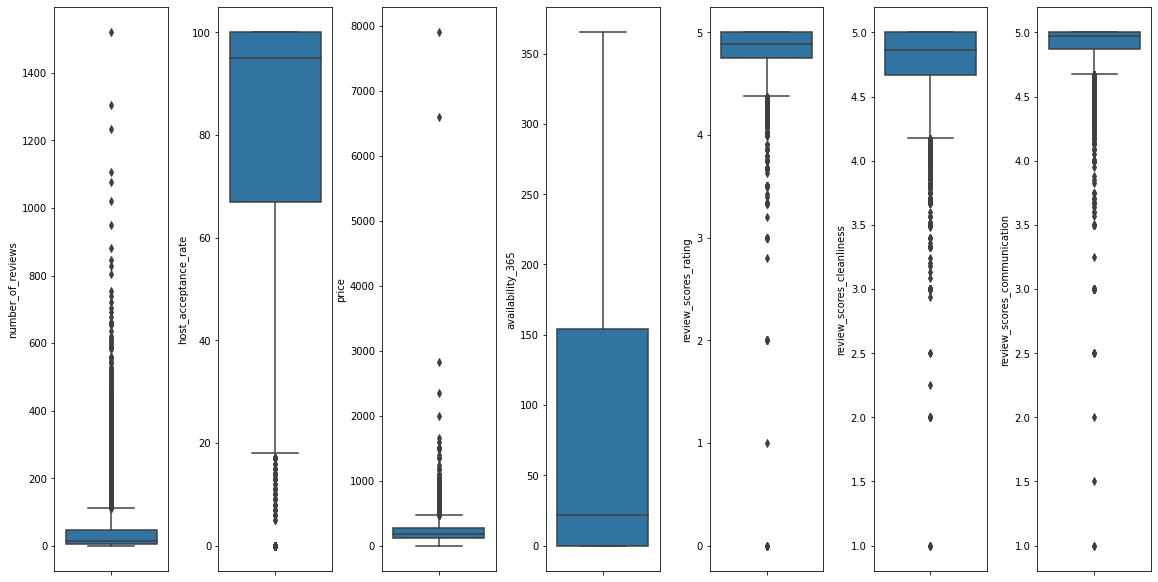

In [100]:
fig, axs = plt.subplots(ncols=7, figsize=(16,8))
index=0
axs=axs.flatten()
copiadf=df.copy()
copiadf=copiadf.drop('room_type', axis=1)
for k, v in copiadf.items(): # k variable, v valores
  sns.boxplot(y=k, data=df, ax=axs[index])
  index += 1
plt.tight_layout(pad=0.4)

Se observan valores atípicos muy marcados en el precio por encima de 0.2 x10^6, que pueden llegar a afectar a nuestro modelo, además de ser muy pocos, pueden ser habitaciones muy caras poco rentadas que no resumen de manera adecuada a nuestros datos.
En el caso del review score rating vemos calificaciones muuy bajas menores a 2.5, que aunque tienen sentido, ya que un cliente se pudo haber llevado una experiencias muy mala como para poner un calificación muy baja. Son realemente pocas y pueden no describir de manera correcta a los datos.
En el caso de número de reviews vemos valores extremadamente altos, que pueden corresponder a habitaciones muy rentadas, pero que estas pueden afectar a nuestro modelo.

In [101]:
y=df

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido number_of_reviews              111.500
host_acceptance_rate           149.500
price                          472.500
availability_365               385.000
review_scores_rating             5.375
review_scores_cleanliness        5.495
review_scores_communication      5.195
dtype: float64
Limite inferior permitido number_of_reviews              -60.500
host_acceptance_rate            17.500
price                          -83.500
availability_365              -231.000
review_scores_rating             4.375
review_scores_cleanliness        4.175
review_scores_communication      4.675
dtype: float64


In [102]:
df=df[df['number_of_reviews']<111.500]
df=df[df['host_acceptance_rate']>17.500]
df=df[df['price']<472.500]
df=df[df['review_scores_rating']>4.375]
df=df[df['review_scores_cleanliness']>4.275]
df=df[df['review_scores_communication']>4.675]
df.head()

,number_of_reviews,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication,room_type
5,44,100,240.0,0,4.72,4.45,4.90,Entire home/apt
8,63,50,250.0,0,4.95,4.92,4.98,Entire home/apt
10,36,33,120.0,0,4.91,4.88,4.94,Entire home/apt
13,90,100,165.0,66,4.80,4.70,4.84,Private room
15,55,100,115.0,0,4.89,4.91,4.96,Entire home/apt


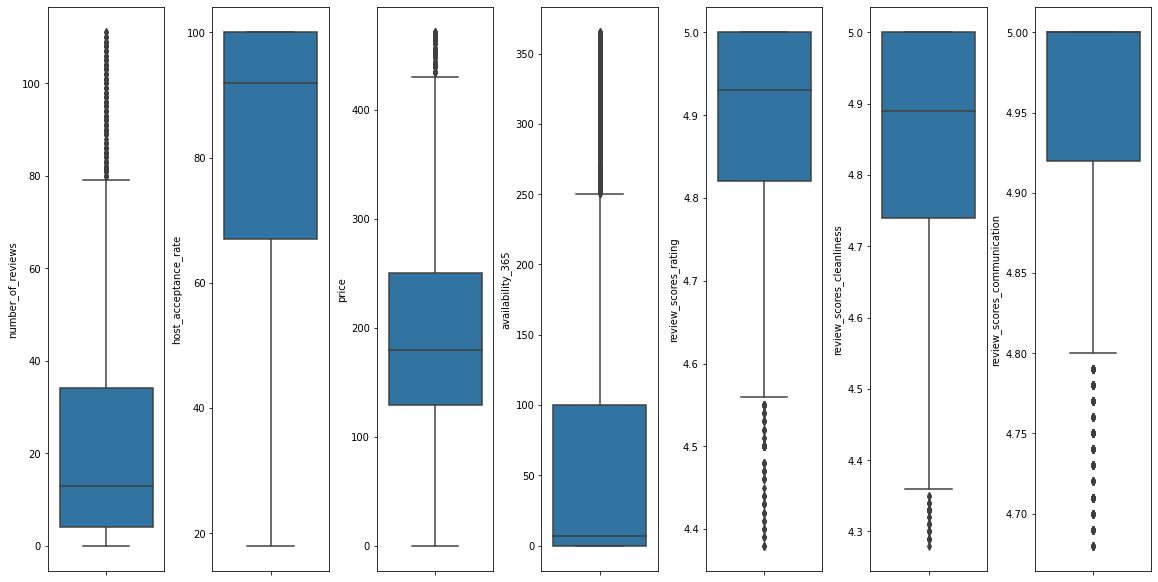

In [103]:
fig, axs = plt.subplots(ncols=7, figsize=(16,8))
index=0
axs=axs.flatten()
copiadf=df.copy()
copiadf=copiadf.drop('room_type', axis=1)
for k, v in copiadf.items(): # k variable, v valores
  sns.boxplot(y=k, data=df, ax=axs[index])
  index += 1
plt.tight_layout(pad=0.4)

#PUNTO 4

In [144]:
#División en 3 DataFrames

Home=df[df['room_type']=='Entire home/apt']
Room=df[df['room_type']=='Private room']
Shared=df[df['room_type']=='Shared room']
Hotel=df[df['room_type']=='Hotel room']
print(Home.shape)
print(Room.shape)
print(Shared.shape)
print(Hotel.shape)

(3591, 8)
(917, 8)
(18, 8)
(44, 8)


In [105]:
def correlaciones(i):
  print('number_of_reviews vs host_acceptance_rate: ',abs(i['number_of_reviews'].corr(i['host_acceptance_rate'])))
  print('number_of_reviews  vs review_scores_rating: ',abs(i['number_of_reviews'].corr(i['review_scores_rating'])))
  print('number_of_reviews  vs price: ',abs(i['number_of_reviews'].corr(i['price'])))
  print('number_of_reviews  vs review_scores_cleanliness: ',abs(i['number_of_reviews'].corr(i['review_scores_cleanliness'])))
  print('number_of_reviews  vs availability_365: ',abs(i['number_of_reviews'].corr(i['availability_365'])))
  print('number_of_reviews  vs review_scores_communication: ',abs(i['number_of_reviews'].corr(i['review_scores_communication'])))

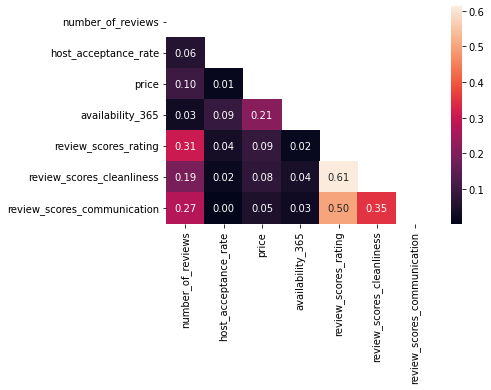

In [106]:
#Mapa de correlaciones
Corr_Factors=Home.corr()
Corr_Factors_abs= abs(Corr_Factors)
mask=np.triu(np.ones_like(df.corr(),dtype=bool))
Heat_Map=sns.heatmap(Corr_Factors_abs, annot=True,mask=mask, fmt='.2f')
Heat_Map

In [107]:
correlaciones(Home)

number_of_reviews vs host_acceptance_rate:  0.06136357821019017
number_of_reviews  vs review_scores_rating:  0.30738199211246336
number_of_reviews  vs price:  0.09901237272508372
number_of_reviews  vs review_scores_cleanliness:  0.19096219311513005
number_of_reviews  vs availability_365:  0.030861368914737897
number_of_reviews  vs review_scores_communication:  0.2734764313076942


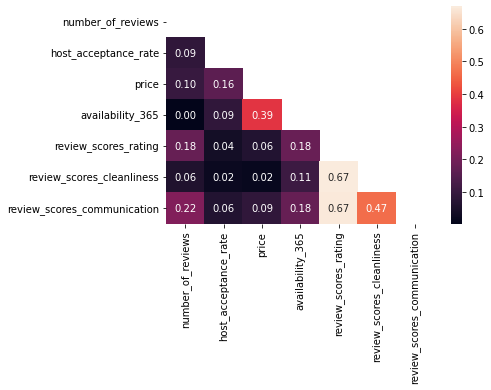

In [108]:
#Mapa de correlaciones
Corr_Factors=Room.corr()
Corr_Factors_abs= abs(Corr_Factors)
mask=np.triu(np.ones_like(df.corr(),dtype=bool))
Heat_Map=sns.heatmap(Corr_Factors_abs, annot=True, mask=mask, fmt='.2f')
Heat_Map

In [109]:
correlaciones(Room)

number_of_reviews vs host_acceptance_rate:  0.08640714320474652
number_of_reviews  vs review_scores_rating:  0.17843724720272014
number_of_reviews  vs price:  0.09962001067935795
number_of_reviews  vs review_scores_cleanliness:  0.059066446394493724
number_of_reviews  vs availability_365:  0.0017101601173593465
number_of_reviews  vs review_scores_communication:  0.21826571253938698


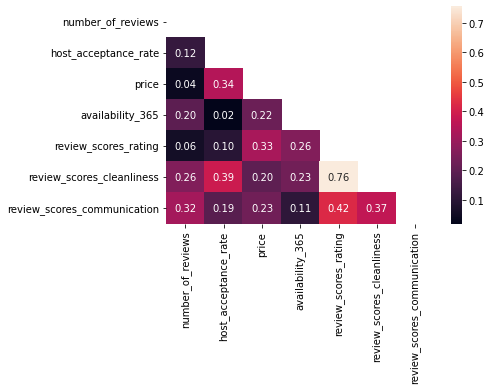

In [110]:
#Mapa de correlaciones
Corr_Factors=Shared.corr()
Corr_Factors_abs= abs(Corr_Factors)
mask=np.triu(np.ones_like(df.corr(),dtype=bool))
Heat_Map=sns.heatmap(Corr_Factors_abs, annot=True, mask=mask,fmt='.2f')
Heat_Map

In [111]:
correlaciones(Shared)

number_of_reviews vs host_acceptance_rate:  0.12441261754461413
number_of_reviews  vs review_scores_rating:  0.05874728617521897
number_of_reviews  vs price:  0.04107930936291522
number_of_reviews  vs review_scores_cleanliness:  0.2585643328613199
number_of_reviews  vs availability_365:  0.19716441592598624
number_of_reviews  vs review_scores_communication:  0.32111495604655355


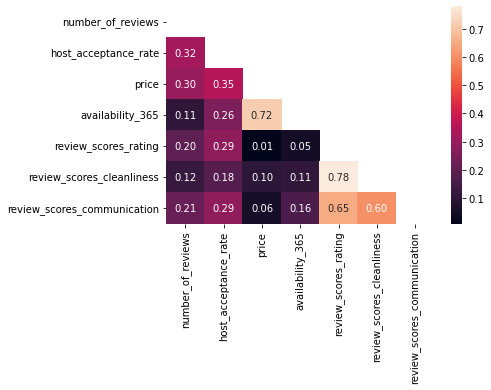

In [145]:
#Mapa de correlaciones
Corr_Factors=Hotel.corr()
Corr_Factors_abs= abs(Corr_Factors)
mask=np.triu(np.ones_like(df.corr(),dtype=bool))
Heat_Map=sns.heatmap(Corr_Factors_abs, annot=True, mask=mask,fmt='.2f')
Heat_Map

In [146]:
correlaciones(Hotel)

number_of_reviews vs host_acceptance_rate:  0.3224611001316103
number_of_reviews  vs review_scores_rating:  0.19842958046075673
number_of_reviews  vs price:  0.30088399258575355
number_of_reviews  vs review_scores_cleanliness:  0.1218027804075313
number_of_reviews  vs availability_365:  0.10746615835021579
number_of_reviews  vs review_scores_communication:  0.21386573403612985


#PUNTO 5

HOME

In [112]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [115]:
Var_Dep=Home['number_of_reviews']
Var_Indep=Home[['review_scores_cleanliness']]

In [117]:
model.fit(X=Var_Indep, y=Var_Dep)
model.__dict__
model.score(X=Var_Indep,y=Var_Dep)

0.036466559199340165

PRIVATE ROOM

In [123]:
modelP=LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [131]:
PVar_Dep=Room['number_of_reviews']
PVar_Indep=Room[['review_scores_communication']]

In [132]:
modelP.fit(X=PVar_Indep, y=PVar_Dep)
modelP.__dict__
modelP.score(X=PVar_Indep,y=PVar_Dep)

0.047639921270326124

SHARED ROOM

In [137]:
modelS=LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [138]:
SVar_Dep=Shared['number_of_reviews']
SVar_Indep=Shared[['review_scores_communication']]

In [139]:
modelS.fit(X=SVar_Indep, y=SVar_Dep)
modelS.__dict__
modelS.score(X=SVar_Indep,y=SVar_Dep)

0.10311481499677977

HOTEL ROOM

In [155]:
modelH=LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [156]:
HVar_Dep=Hotel['number_of_reviews']
HVar_Indep=Hotel[['host_acceptance_rate']]

In [157]:
modelH.fit(X=HVar_Indep, y=HVar_Dep)
modelH.__dict__
modelH.score(X=HVar_Indep,y=HVar_Dep)

0.10398116109808853

#PUNTO 6

In [158]:
#Home
coef_Deter=model.score(X=Var_Indep,y=Var_Dep)
coef_Deter

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- review_scores_communication
Feature names seen at fit time, yet now missing:
- review_scores_cleanliness

  warnings.warn(message, FutureWarning)


0.01987426397314207

In [159]:
#Home
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.1409761113562935

In [160]:
#Private Room
coef_DeterP=modelP.score(X=PVar_Indep,y=PVar_Dep)
coef_DeterP

0.047639921270326124

In [161]:
#Private Room
coef_Correlp=np.sqrt(coef_DeterP)
coef_Correlp

0.21826571253938656

In [162]:
#Shared Room
coef_Deters=modelS.score(X=SVar_Indep,y=SVar_Dep)
coef_Deters

0.10311481499677977

In [163]:
#Shared Room
coef_Correls=np.sqrt(coef_Deters)
coef_Correls

0.32111495604655316

In [164]:
#Hotel Room
coef_Deterh=modelH.score(X=HVar_Indep,y=HVar_Dep)
coef_Deterh

0.10398116109808853

In [165]:
#Hotel Room
coef_Correlh=np.sqrt(coef_Deterh)
coef_Correlh

0.3224611001316105

In [166]:
Tabla = pd.DataFrame()

In [167]:
Tabla['Tipo de habitacion'] = ['Entire room/apt', 'Private room', 'Shared room', 'Hotel room']
Tabla['Coef_det']=[coef_Deter,coef_DeterP,coef_Deters,coef_Deterh]
Tabla['Coef_Correl']=[coef_Correl,coef_Correlp,coef_Correls,coef_Correlh]

In [168]:
print(Tabla)

  Tipo de habitacion  Coef_det  Coef_Correl
0    Entire room/apt  0.019874     0.140976
1       Private room  0.047640     0.218266
2        Shared room  0.103115     0.321115
3         Hotel room  0.103981     0.322461
